In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

FileNotFoundError: [Errno 2] No such file or directory: 'plots/training-loss.png'

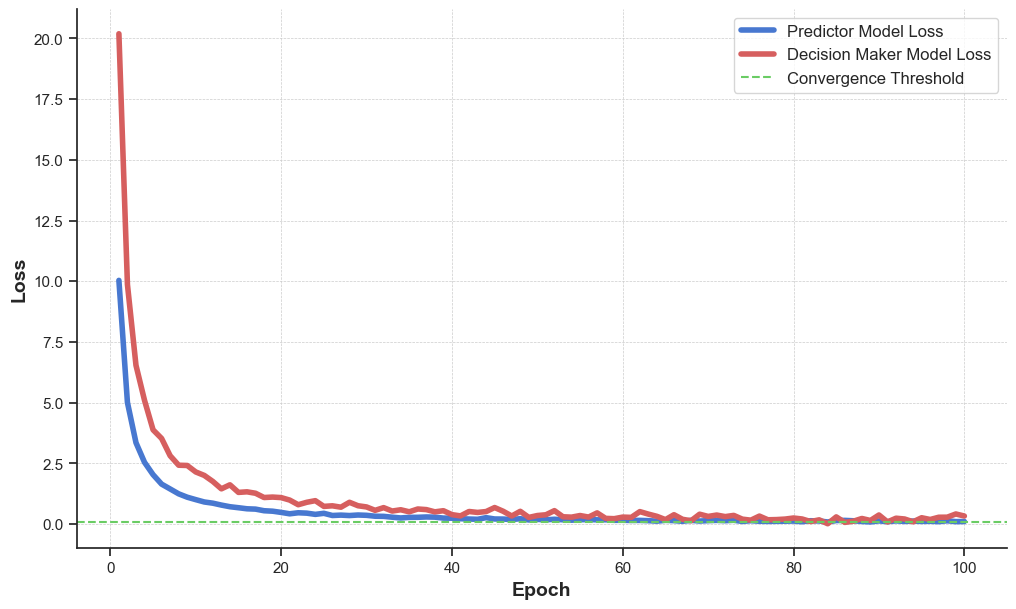

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the Nature-inspired style
sns.set(style="ticks", palette="muted", color_codes=True)

# Simulate the Predictor Model's and Decision Maker Model's loss with appropriate fluctuations
np.random.seed(0)
epochs = np.array(range(1, 101))  # 100 epochs
loss = 1 / (0.1 * epochs) + np.random.normal(0, 0.02, 100)  # Predictor Model loss
dm_loss = 1 / (0.05 * epochs) + np.random.normal(0, 0.1, 100)  # Decision Maker Model loss

# Define a very small threshold for convergence
convergence_threshold = 0.1

# Plotting both loss curves
plt.figure(figsize=(12, 7))

# Predictor's model loss
plt.plot(epochs, loss, label='Predictor Model Loss', color='b', linewidth=4)

# Decision Maker model loss
plt.plot(epochs, dm_loss, label='Decision Maker Model Loss', color='r', linewidth=4)

# Adding a horizontal line for the convergence threshold
plt.axhline(y=convergence_threshold, color='g', linestyle='--', label='Convergence Threshold')

# Enhancing the plot
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=14, fontweight='bold')
plt.legend(frameon=True, fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

# Removing top and right spines for a cleaner look
sns.despine()
plt.savefig(os.path.join('plots', 'training-loss.png'))
# Show the plot
plt.show()


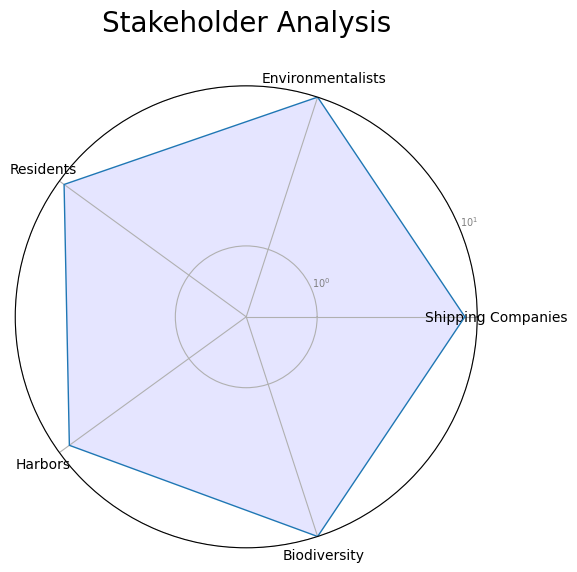

In [3]:
# Adjusting the color scheme and formatting to match the schematic provided by the user

# Variables
labels=np.array(['Shipping Companies', 'Environmentalists', 'Residents', 'Harbors', 'Biodiversity'])

# Random data for each variable
# Assuming each variable has a score out of 10
data = np.array([np.random.randint(8, 11) for _ in range(len(labels))])

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart is a circle, so we need to "complete the loop"
# and append the start to the end.
data = np.concatenate((data,[data[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], labels)

# Draw ylabels
ax.set_rscale('symlog')
plt.yticks(color="grey", size=7)
plt.ylim(0,10)

# Plot data
ax.plot(angles, data, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, data, 'b', alpha=0.1)

# Add a title and a color to the chart for better matching to the provided schematic
plt.title('Stakeholder Analysis', size=20, color='black', y=1.1)

plt.show()


In [13]:
def get_Lake(sheet_name):
    df = pd.read_excel('Problem_D_Great_Lakes.xlsx',sheet_name=sheet_name, skiprows=6)
    df.replace("---", None, inplace=True)
    return df.set_index('Year').dropna()

In [6]:
River_name = ['St. Mary\'s River','St. Clair River','Detroit River','Niagara River','Ottawa River','St. Lawrence River']

In [27]:
import pandas as pd

def normalize_series(series):
    """
    将Series进行标准化（std normalization）
    
    参数:
        - series: 要标准化的Series
        
    返回值:
        - std_normalized_series: 标准化后的Series
    """
    mean_val = series.mean()
    std_val = series.std()
    std_normalized_series = (series - mean_val) / std_val
    
    return std_normalized_series

In [28]:
normalize_series(get_Lake(River_name[0]).mean())

Jan   -0.788933
Feb   -0.949314
Mar   -0.975933
Apr   -1.205127
May   -0.675717
Jun    0.317272
Jul    1.497372
Aug    1.668136
Sep    0.844584
Oct    0.606996
Nov    0.248790
Dec   -0.588126
dtype: float64

In [60]:
Average_Level = []
for i in River_name:
    Average_Level.append(get_Lake(i).mean())


In [61]:
Average_Level_df = pd.concat(Average_Level,axis=1)
Average_Level_df.columns = River_name

In [137]:
Average_Level_df.mean(axis=0)

St. Mary's River      2173.330474
St. Clair River       5624.015622
Detroit River         5864.309455
Niagara River         6005.198413
Ottawa River          2051.594697
St. Lawrence River    7833.897762
dtype: float64

In [29]:
Average_Level_with_norm = []
for i in River_name:
    Average_Level_with_norm.append(normalize_series(get_Lake(i).mean()))


In [30]:
Average_Level_with_norm_df = pd.concat(Average_Level_with_norm,axis=1)
Average_Level_with_norm_df.columns = River_name

<Axes: >

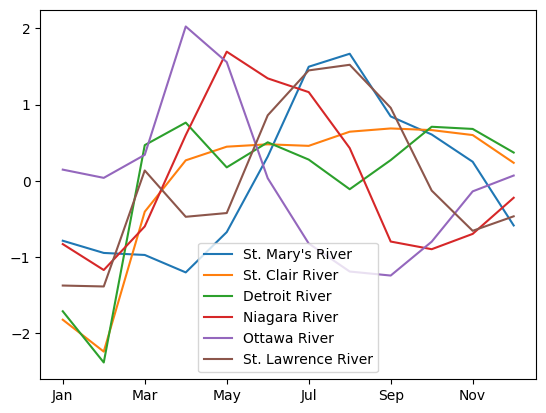

In [31]:
import matplotlib.pyplot as plt
Average_Level_with_norm_df.plot()

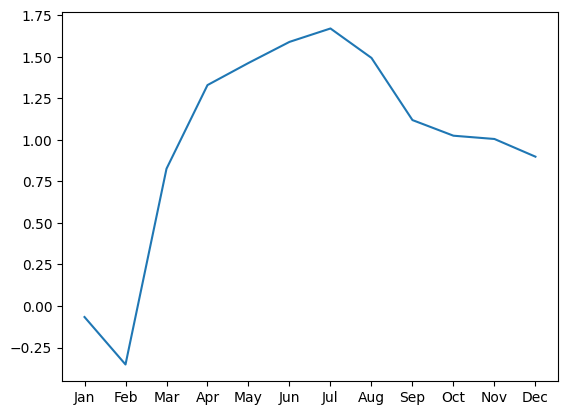

In [36]:
River_mean = Average_Level_with_norm_df.mean(axis=1)+1
plt.plot(River_mean)

In [42]:
River_mean 

Jan   -0.066163
Feb   -0.351727
Mar    0.826076
Apr    1.329435
May    1.462488
Jun    1.589341
Jul    1.670037
Aug    1.492972
Sep    1.118900
Oct    1.024833
Nov    1.005115
Dec    0.898694
dtype: float64

In [46]:
lam_Winter = River_mean[['Dec','Jan','Feb']].mean()
lam_Winter

0.1602680005918545

In [45]:
lam_Spring = River_mean[['Mar','Apr','May']].mean()
lam_Spring

1.2059995218868558

In [48]:
lam_Summer = River_mean[['Jun','Jul','Aug']].mean()
lam_Summer

1.5841166222323455

In [49]:
lam_Full = River_mean[['Sep','Oct','Nov']].mean()
lam_Full

1.0496158552889414

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(series):
    plt.figure(figsize=(10,1))
    sns.heatmap(series.reshape(1, -1), annot=True, cmap="YlGnBu", cbar=False)
    plt.xticks(ticks=range(len(series)), labels=['Winter','Spring','Summer','Full'], rotation=0)
    plt.yticks([])
    plt.show()

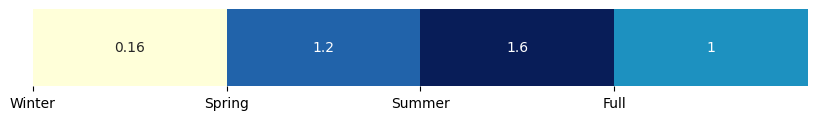

In [56]:
import numpy as np
plot_heatmap(np.array([0.16026,1.20599,1.5841,1.04961]))

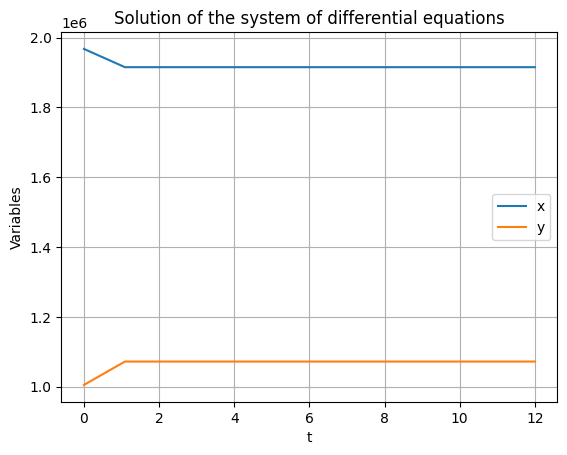

In [138]:


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

river_base =Average_Level_df.mean().tolist()
# 定义微分方程

def model(v,t,river_base=[2000,1000],environmet_base=[1000,500]):
    v1,v2 = v[0], v[1]
    #season=0
    #print(v1,v2)
    dv1dt = environmet_base[0] -1/3*((3*v1)/3.14/100**2-183)*100**2*river_base[0] #假设半径100,Level=183
    dv2dt = environmet_base[1] +1/3*((3*v1)/3.14/100**2-183)*100**2 -1/3*((3*v2)/3.14/80**2-160)*180**2*river_base[1] #假设半径80,Level=160
    #print([dv1dt,dv2dt])
    return [dv1dt,dv2dt]

# 定义初始条件
y0 = [1/3*3.14*100**2*188,1/3*3.14*80**2*150]

# 定义时间范围
t = np.linspace(0, 12,12)

# 解微分方程
y = odeint(model, y0, t)

# 提取结果
x = y[:, 0]
y = y[:, 1]

# 绘制结果
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.xlabel('t')
plt.ylabel('Variables')
plt.title('Solution of the system of differential equations')
plt.legend()
plt.grid(True)
plt.show()


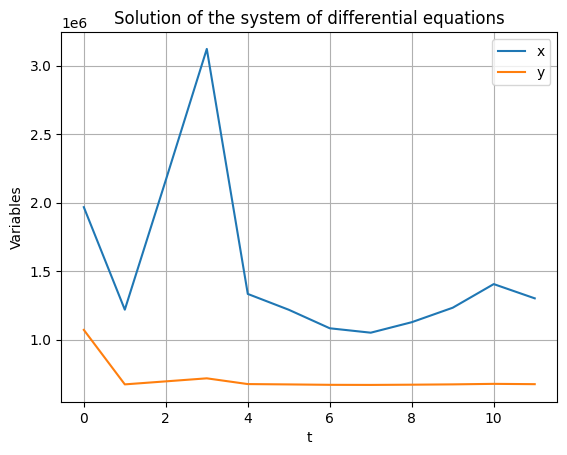

In [140]:


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

river_base =Average_Level_df.mean().tolist()
# 定义微分方程

def model(v,t,river_base=[2000,1000],environmet_base=[100000000,5000000]):
    v1,v2 = v[0], v[1]
    season=1
    if t>=3 and t<6:
        season = 1.2
    elif t>=6 and t<9:
        season=1.6
    elif t>=9 and t<12:
        season = 1
    else:
        season=0.16
    #print(season)
    #print(v1,v2)

    
    dv1dt = environmet_base[0]*(1+np.sin(t-2)) -1/3*((3*v1)/3.14/100**2-(3*v2)/3.14/80**2)*100**2*river_base[0]*season*0.9 #假设半径100,Level=183
    dv2dt = environmet_base[1]*(1+np.sin(t-2)) +1/3*((3*v1)/3.14/100**2-(3*v2)/3.14/80**2)*100**2 -1/3*((3*v2)/3.14/80**2-100)*160**2*river_base[1]*season #假设半径80,Level=160
    #print([dv1dt,dv2dt])
    return [dv1dt,dv2dt]

# 定义初始条件
y0 = [1/3*3.14*100**2*188,1/3*3.14*80**2*160]

# 定义时间范围
t = np.linspace(0, 11,12)

# 解微分方程
y = odeint(model, y0, t)

# 提取结果
x = y[:, 0]
y = y[:, 1]

# 绘制结果
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.xlabel('t')
plt.ylabel('Variables')
plt.title('Solution of the system of differential equations')
plt.legend()
plt.grid(True)
plt.show()


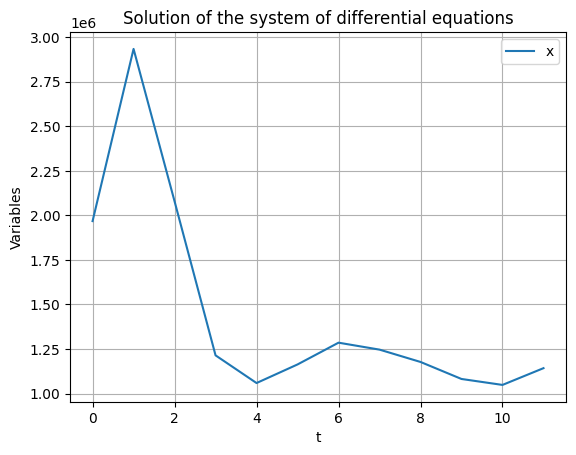

In [134]:


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

river_base =Average_Level_df.mean().tolist()
# 定义微分方程

def model(v,t,river_base=[2000,1000],environmet_base=[100000000,5000000]):
    v1,v2 = v[0], v[1]
    season=1
    if t>=3 and t<6:
        season = 1.2
    elif t>=6 and t<9:
        season=1.6
    elif t>=9 and t<12:
        season = 1
    else:
        season=0.16
    #print(season)
    #print(v1,v2)

    
    dv1dt = environmet_base[0]*(1-np.sin(t-2)) -1/3*((3*v1)/3.14/100**2-(3*v2)/3.14/80**2)*100**2*river_base[0]*season #假设半径100,Level=183
    dv2dt = environmet_base[1]*(1-np.sin(t-2)) +1/3*((3*v1)/3.14/100**2-(3*v2)/3.14/80**2)*100**2 -1/3*((3*v2)/3.14/80**2-100)*160**2*river_base[1]*season #假设半径80,Level=160
    #print([dv1dt,dv2dt])
    return [dv1dt,dv2dt]

# 定义初始条件
y0 = [1/3*3.14*100**2*188,1/3*3.14*80**2*160]

# 定义时间范围
t = np.linspace(0, 11,12)

# 解微分方程
y = odeint(model, y0, t)

# 提取结果
x = y[:, 0]
y = y[:, 1]

# 绘制结果
plt.plot(t, x, label='x')
#plt.plot(t, y, label='y')
plt.xlabel('t')
plt.ylabel('Variables')
plt.title('Solution of the system of differential equations')
plt.legend()
plt.grid(True)
plt.show()
